In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,RandomTreesEmbedding

In [2]:
df = pd.read_csv('./PimaDiabetes.csv')
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print('Plas: ',len(df[df.Plas == 0]),'\n','Pres: ',len(df[df.Pres == 0]),'\n','skin: ',len(df[df.skin == 0]),'\n','test: ',len(df[df.test == 0]),'\n','mass: ',len(df[df.test == 0]),'\n','pedi: ',len(df[df.pedi == 0]),'\n','age: ',len(df[df.age == 0]))

Plas:  5 
 Pres:  35 
 skin:  227 
 test:  374 
 mass:  374 
 pedi:  0 
 age:  0


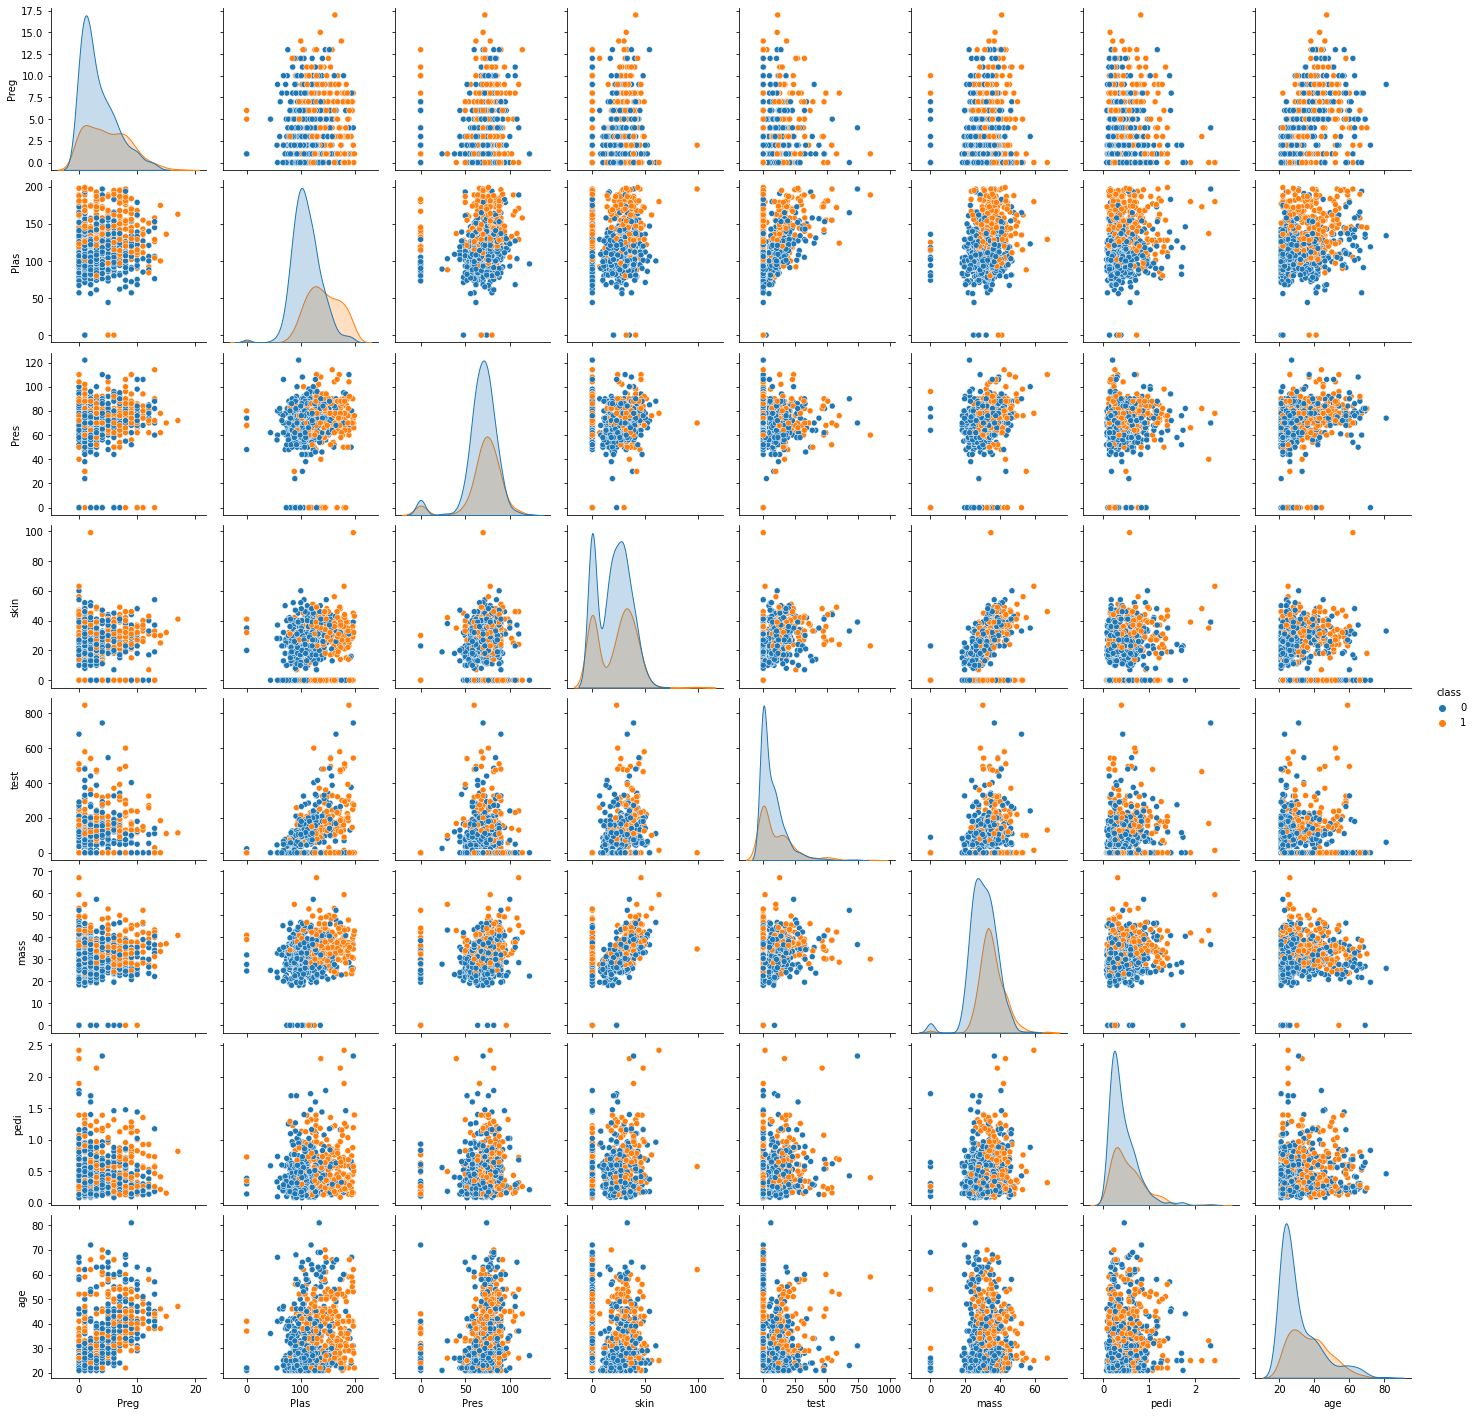

In [4]:
sb.pairplot(df, diag_kind= 'kde', hue = 'class');

## Therefore Logistic may not be suitable as there are overlapping points with hue of class


In [5]:
dfplas = df[df.Plas!=0]
dfpres = df[df.Pres!=0]
dfskin = df[df.skin!=0]
dftest = df[df.test!=0]
dfmass = df[df.mass!=0]
meanplas = np.mean(dfplas.Plas)
meanpres = np.mean(dfpres.Pres)
meanskin = np.mean(dfskin.skin)
meantest = np.mean(dftest.test)
meanmass = np.mean(dfmass.mass)
df.Plas = df['Plas'].replace(0,meanplas)
df.Pres = df['Pres'].replace(0,meanpres)
df.skin = df['skin'].replace(0,meanskin)
df.test = df['test'].replace(0,meantest)
df.mass = df['mass'].replace(0,meanmass)
print('Plas: ',len(df[df.Plas == 0]),'\n','Pres: ',len(df[df.Pres == 0]),'\n','skin: ',len(df[df.skin == 0]),'\n','test: ',len(df[df.test == 0]),'\n','mass: ',len(df[df.test == 0]),'\n','pedi: ',len(df[df.pedi == 0]),'\n','age: ',len(df[df.age == 0]))

Plas:  0 
 Pres:  0 
 skin:  0 
 test:  0 
 mass:  0 
 pedi:  0 
 age:  0


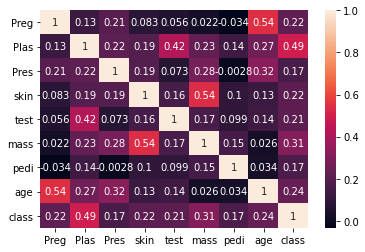

In [6]:
sb.heatmap(df.corr(), annot = True);

In [7]:
print(df.dtypes)

Preg       int64
Plas     float64
Pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [8]:
X = df.drop(['class'], axis =1)
Y = df['class']
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size = 0.15, random_state =1)
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(652, 8)
(116, 8)
(652,)
(116,)


In [9]:
scaler = preprocessing.StandardScaler().fit(X_TRAIN)
X_SCALED = scaler.fit_transform(X_TRAIN)
X_TEST_SCALED = scaler.transform(X_TEST)
log_reg = linear_model.LogisticRegression(random_state= 1)
log_reg.fit(X_SCALED, Y_TRAIN)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print('Test score: ',log_reg.score(X_TEST_SCALED, Y_TEST),'\n', 'Train score: ', log_reg.score(X_SCALED, Y_TRAIN))

Test score:  0.7844827586206896 
 Train score:  0.7714723926380368


### Trying new solvers

In [11]:
log_reg = linear_model.LogisticRegression(random_state= 1, solver='newton-cg')
log_reg.fit(X_SCALED, Y_TRAIN)
print('Test score: ',log_reg.score(X_TEST_SCALED, Y_TEST),'\n', 'Train score: ', log_reg.score(X_SCALED, Y_TRAIN))

Test score:  0.7844827586206896 
 Train score:  0.7714723926380368


In [12]:
log_reg = linear_model.LogisticRegression(random_state= 1, solver='liblinear')
log_reg.fit(X_SCALED, Y_TRAIN)
print('Test score: ',log_reg.score(X_TEST_SCALED, Y_TEST),'\n', 'Train score: ', log_reg.score(X_SCALED, Y_TRAIN))

Test score:  0.7844827586206896 
 Train score:  0.7699386503067485


In [13]:
log_reg = linear_model.LogisticRegression(random_state= 1, solver='sag')
log_reg.fit(X_SCALED, Y_TRAIN)
print('Test score: ',log_reg.score(X_TEST_SCALED, Y_TEST),'\n', 'Train score: ', log_reg.score(X_SCALED, Y_TRAIN))

Test score:  0.7844827586206896 
 Train score:  0.7714723926380368


In [14]:
log_reg = linear_model.LogisticRegression(random_state= 1, solver='saga')
log_reg.fit(X_SCALED, Y_TRAIN)
print('Test score: ',log_reg.score(X_TEST_SCALED, Y_TEST),'\n', 'Train score: ', log_reg.score(X_SCALED, Y_TRAIN))

Test score:  0.7844827586206896 
 Train score:  0.7714723926380368


### Different Strategy

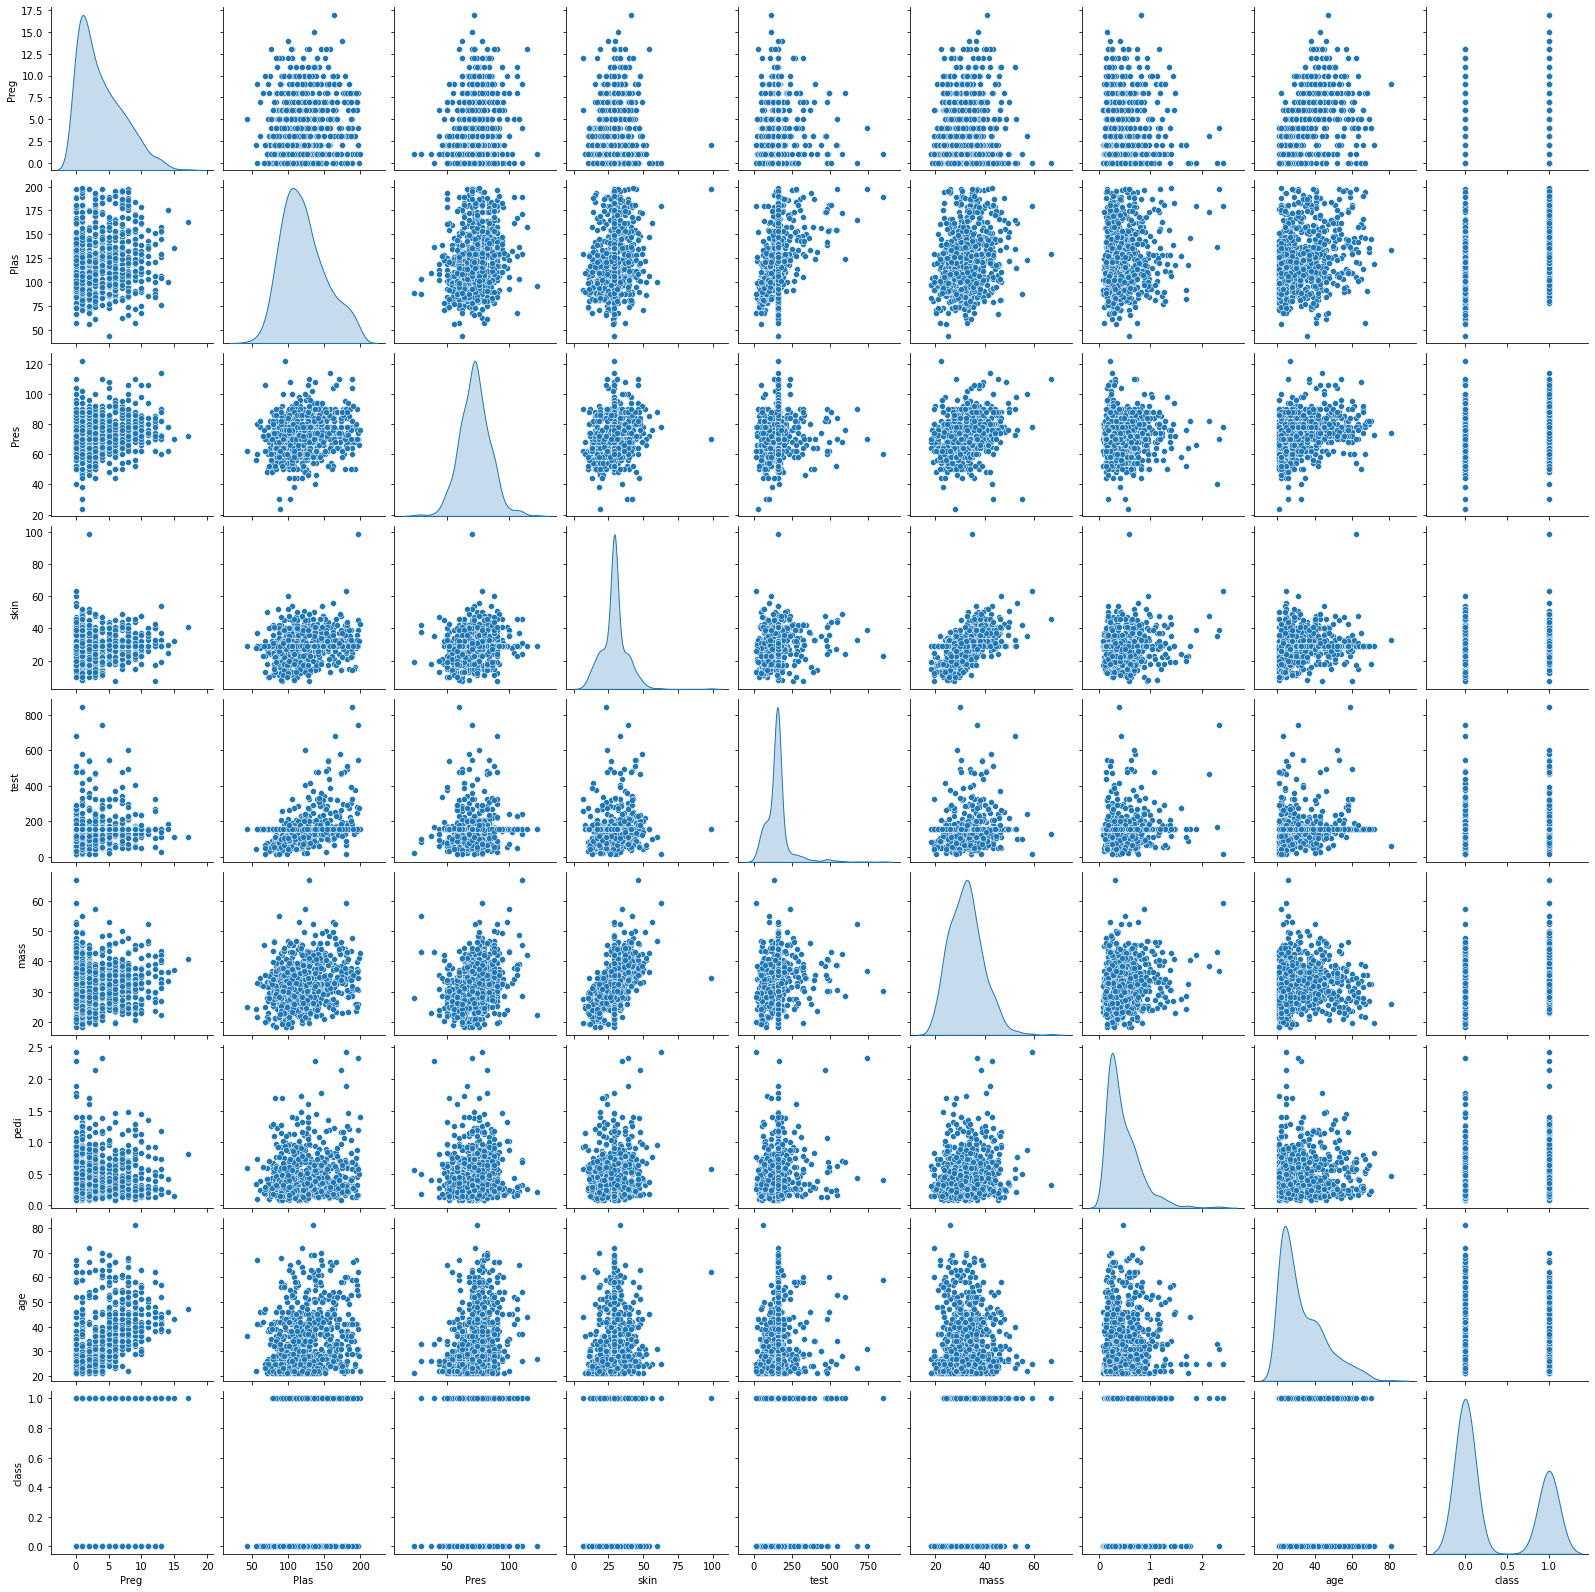

In [15]:
sb.pairplot(df, diag_kind='kde')

In [16]:

log_reg = linear_model.LinearRegression()
log_reg.fit(X_SCALED, Y_TRAIN)
print('Test score: ',log_reg.score(X_TEST_SCALED, Y_TEST),'\n', 'Train score: ', log_reg.score(X_SCALED, Y_TRAIN))

Test score:  0.3652159874266697 
 Train score:  0.31272747459161554


### Random Forest Regressor

In [26]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_TRAIN, Y_TRAIN)
print('Train score: ',clf.score(X_TRAIN, Y_TRAIN),'\n','Test score: ',  clf.score(X_TEST, Y_TEST))

Train score:  0.7515337423312883 
 Test score:  0.75


In [27]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_SCALED, Y_TRAIN)
print('Train score: ',clf.score(X_SCALED, Y_TRAIN),'\n','Test score: ',  clf.score(X_TEST_SCALED, Y_TEST))

Train score:  0.7515337423312883 
 Test score:  0.75


In [29]:
df1 = df.drop(['Preg','Pres','skin'], axis =1)
X = df1.drop(['class'], axis =1)
Y = df1['class']
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size = 0.15, random_state =1)
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(652, 5)
(116, 5)
(652,)
(116,)


In [30]:
scaler = preprocessing.StandardScaler().fit(X_TRAIN)
X_SCALED1 = scaler.fit_transform(X_TRAIN)
X_TEST_SCALED1 = scaler.transform(X_TEST)
log_reg = linear_model.LogisticRegression(random_state= 1)
log_reg.fit(X_SCALED1, Y_TRAIN)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
print('Test score: ',log_reg.score(X_TEST_SCALED1, Y_TEST),'\n', 'Train score: ', log_reg.score(X_SCALED1, Y_TRAIN))

Test score:  0.7758620689655172 
 Train score:  0.7760736196319018
